In [1]:
import tensorflow as tf
from model import VAE

In [2]:
# load mnist dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# normalize data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# reshape data
x_train = x_train.reshape((len(x_train), x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((len(x_test), x_test.shape[1], x_test.shape[2], 1))

# convert data to tensor
x_train = tf.convert_to_tensor(x_train)
x_test = tf.convert_to_tensor(x_test)


11490434/11490434 [==============================] - 0s 0us/step


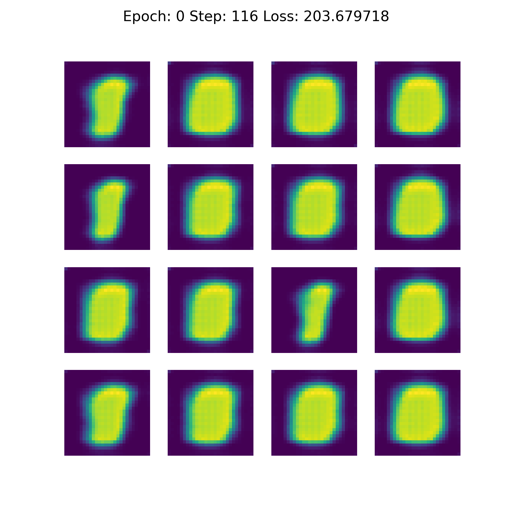

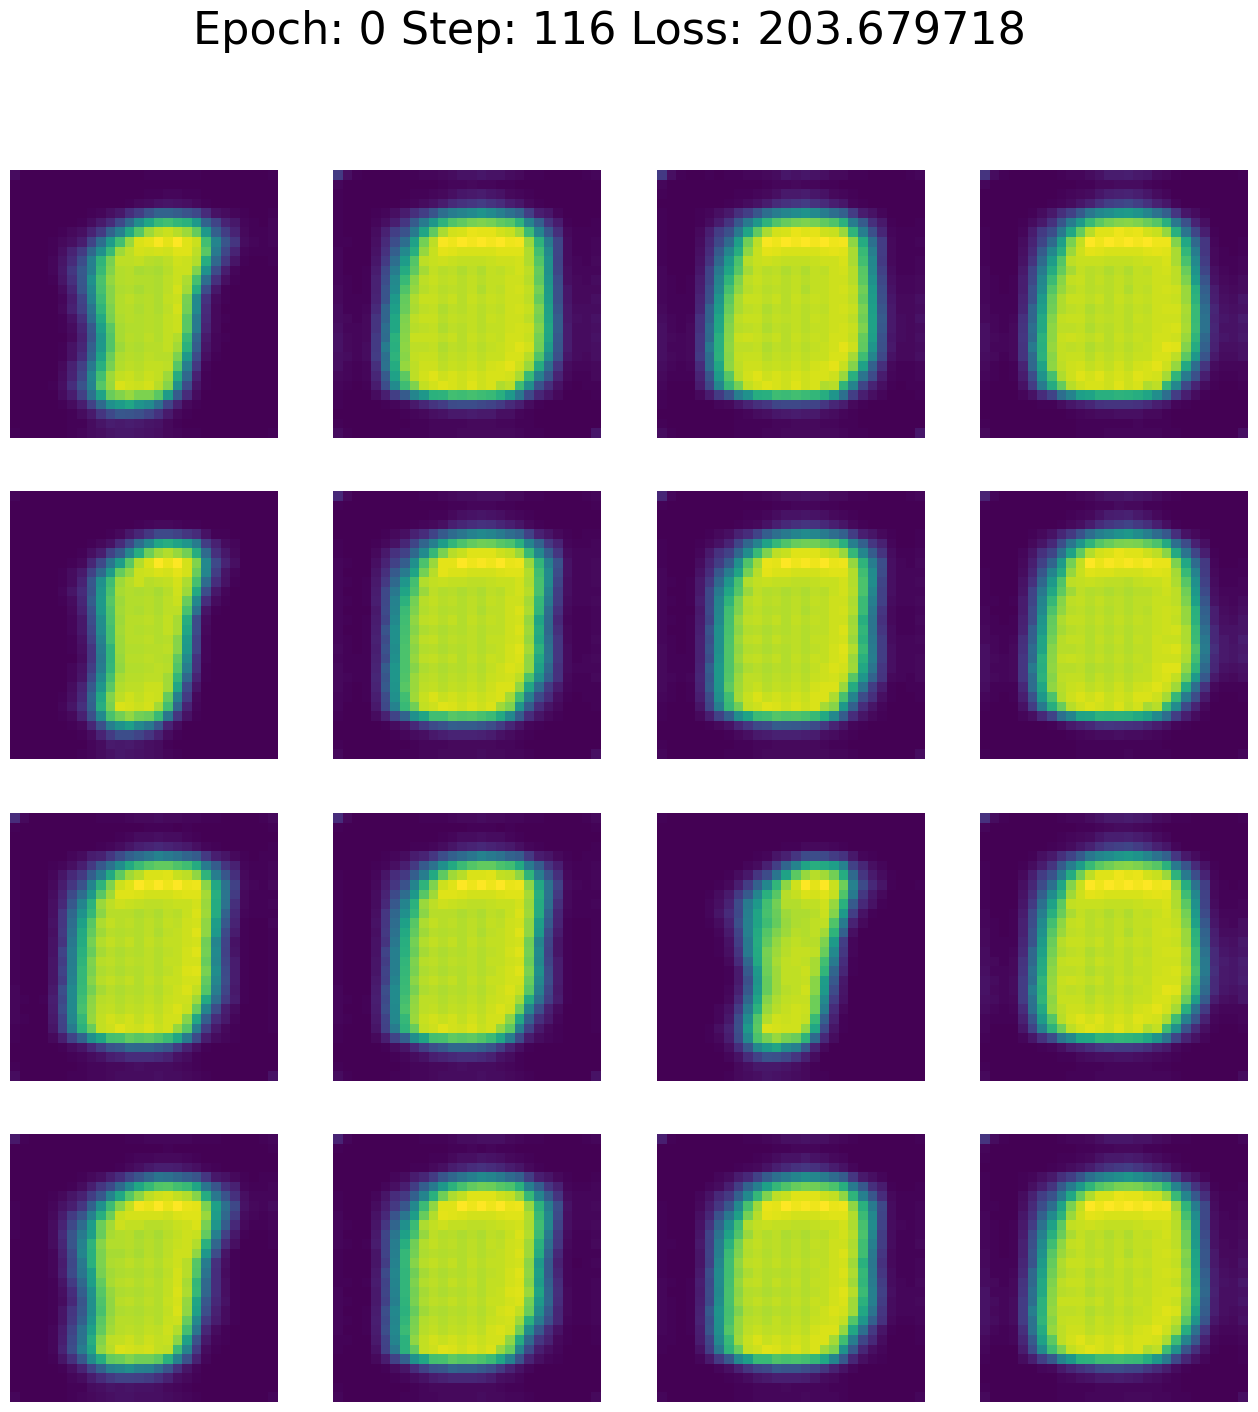

In [3]:
vae_model = VAE(input_shape=(28, 28, 1), latent_dim=2)

vae_model.build(filters=[32, 64], kernel_size=3, activation="relu", bottleneck_shape=16, latten_dim=2)

vae_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), 
            loss=tf.keras.losses.BinaryCrossentropy(),  
            metrics=[tf.keras.metrics.MeanSquaredError()])

gen_images = vae_model.fit(x_train, epochs=1, batch_size=512, show_interval=4, show_image=True)

In [4]:
vae_model.make_annime(gen_images, "VAE.gif", duration=1)